In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [ ]:
import io
from google.colab import files
uploded=files.upload()

Saving weight-height.csv to weight-height.csv


In [ ]:
df=pd.read_csv(io.BytesIO(uploded["weight-height.csv"]))
print(df)

      Gender     Height      Weight
0       Male  73.847017  241.893563
1       Male  68.781904  162.310473
2       Male  74.110105  212.740856
3       Male  71.730978  220.042470
4       Male  69.881796  206.349801
...      ...        ...         ...
9995  Female  66.172652  136.777454
9996  Female  67.067155  170.867906
9997  Female  63.867992  128.475319
9998  Female  69.034243  163.852461
9999  Female  61.944246  113.649103

[10000 rows x 3 columns]


In [ ]:
X=df['Height'].values
y_true=df['Weight'].values
print(X)

[73.84701702 68.78190405 74.11010539 ... 63.86799221 69.03424313
 61.94424588]


In [ ]:
def line(x,w=0,b=0):
  return w*x+b
def mean_squared_error(y_true,y_pred):
  s=(y_true-y_pred)**2
  return np.sqrt(s.mean())  

Text(0.5, 0, 'b')

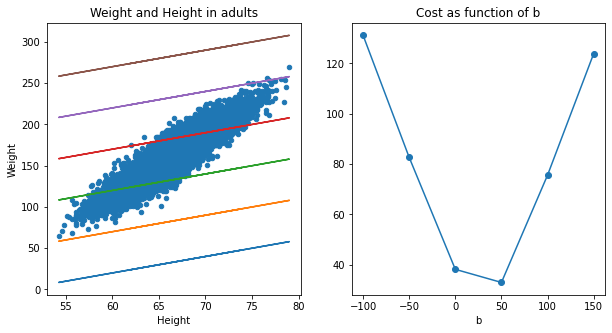

In [ ]:
plt.figure(figsize=(10,5))
axl=plt.subplot(121)
df.plot(kind='scatter',x='Height',
        y='Weight',
        title='Weight and Height in adults',
        ax=axl)
bs=np.array([-100,-50,0,50,100,150])
mses=[]
for b in bs:
  y_pred=line(x=X,w=2,b=b)
  mse=mean_squared_error(y_true, y_pred)
  mses.append(mse)
  plt.plot(X,y_pred)
ax2=plt.subplot(122)
plt.plot(bs,mses,'o-')
plt.title('Cost as function of b')
plt.xlabel('b')  



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

model=Sequential()
model.add(Dense(1,input_shape=(1,)))
model.summary()




Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(Adam(lr=0.8),'mean_squared_error')


In [ ]:
model.fit(X,y_true,epochs=50)

Epoch 1/50
313/313 [==============================] - 1s 898us/step - loss: 1719.8497
Epoch 2/50
313/313 [==============================] - 0s 863us/step - loss: 593.1122
Epoch 3/50
313/313 [==============================] - 0s 949us/step - loss: 510.7774
Epoch 4/50
313/313 [==============================] - 0s 890us/step - loss: 467.0769
Epoch 5/50
313/313 [==============================] - 0s 909us/step - loss: 427.1472
Epoch 6/50
313/313 [==============================] - 0s 1ms/step - loss: 384.9937
Epoch 7/50
313/313 [==============================] - 0s 1ms/step - loss: 373.7072
Epoch 8/50
313/313 [==============================] - 0s 1ms/step - loss: 326.8224
Epoch 9/50
313/313 [==============================] - 0s 1ms/step - loss: 281.8777
Epoch 10/50
313/313 [==============================] - 0s 1ms/step - loss: 273.9062
Epoch 11/50
313/313 [==============================] - 0s 1ms/step - loss: 249.7214
Epoch 12/50
313/313 [==============================] - 0s 984us/step - los

In [ ]:
y_pred=model.predict(X)
y_pred

array([[215.35269],
       [176.58005],
       [217.36667],
       ...,
       [138.96478],
       [178.51163],
       [124.23877]], dtype=float32)

In [ ]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')

plt.plot(X,y_pred,color='blue',linewidth=3)

In [ ]:
(w,b)=model.get_weights()
w

array([[7.6548514]], dtype=float32)

In [ ]:
b

array([-349.9352], dtype=float32)

In [ ]:
model.predict([168])

array([[936.07983]], dtype=float32)